# Background

There are situations when we need to forecast something based on data that has no underlying statistical basis.  When such situations arise, using polynomial curve fitting could prove to be useful.  When using polynomial fit method to forecast warranty claims data, it is best to wait to use this method when we think the # of claims have peaked and to also use 2-degrees.  If you use more than 2 degrees, you will most likely "over-fit".  2-degrees polynomial model tend to model gradual decline in occurrences very well.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

### Read in sample data - vehicle transmission replacements

In [2]:
df = pd.read_csv('../data/transmission_replacements.csv')

In [3]:
df.head()

,CLAIM_MTH,Actual Qty
0,201408,0
1,201409,5
2,201410,15
3,201411,5
4,201412,6


#### We want our dates in CLAIM_MTH to be actual date data type, but it was read in as integer data type

In [4]:
df.dtypes

CLAIM_MTH     int64
Actual Qty    int64
dtype: object

#### We'll convert CLAIM_MTH to string and use string concatenation to make the proper conversion to date data type

In [5]:
df = df.assign(CLAIM_MTH=df.CLAIM_MTH.astype(str))

In [6]:
df = df.assign(CLAIM_MTH=pd.to_datetime(df.CLAIM_MTH.str[:4] + '-' + df.CLAIM_MTH.str[4:6] + '-01')).set_index('CLAIM_MTH')

In [7]:
df.dtypes

Actual Qty    int64
dtype: object

In [8]:
df.head()

,Actual Qty
CLAIM_MTH,
2014-08-01,0
2014-09-01,5
2014-10-01,15
2014-11-01,5
2014-12-01,6


In [9]:
df.head().index

DatetimeIndex(['2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01'],
              dtype='datetime64[ns]', name='CLAIM_MTH', freq=None)

We see that our CLAIM_MTH has been successfully converted to datetime data type.

### Plot the actual quantities

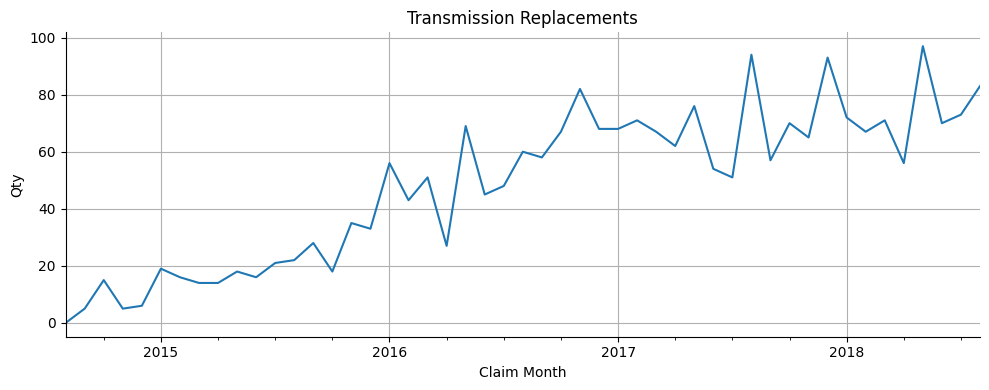

In [10]:
fig, ax = plt.subplots(figsize=(10,4))

df['Actual Qty'].plot(ax=ax)
plt.grid(visible=True)
plt.xlabel('Claim Month')
plt.ylabel('Qty')
plt.title('Transmission Replacements')
ax.spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.show()

### Create y and x values to be curve-fitted with polynomial

In [11]:
y = df['Actual Qty'].values

In [12]:
y

array([ 0,  5, 15,  5,  6, 19, 16, 14, 14, 18, 16, 21, 22, 28, 18, 35, 33,
       56, 43, 51, 27, 69, 45, 48, 60, 58, 67, 82, 68, 68, 71, 67, 62, 76,
       54, 51, 94, 57, 70, 65, 93, 72, 67, 71, 56, 97, 70, 73, 83],
      dtype=int64)

In [13]:
x = np.linspace(start=1, stop=len(y), num=len(y))

In [14]:
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

### Get coefficients of the polynomial fit with 2 degrees and generate polynomial function

In [15]:
coefs = poly.polyfit(x, y, 2)
ffit = poly.polyval(x, coefs)

In [16]:
coefs

array([-6.9827399 ,  3.26817348, -0.03179612])

### Based on the coefficients generated above, the 2-degree polynomial equation is modeled to be:

$y = -0.03179612{\space}x^2 + 3.26817348{\space}x - 6.9827399$

### Plot actual data line with polynomial fit

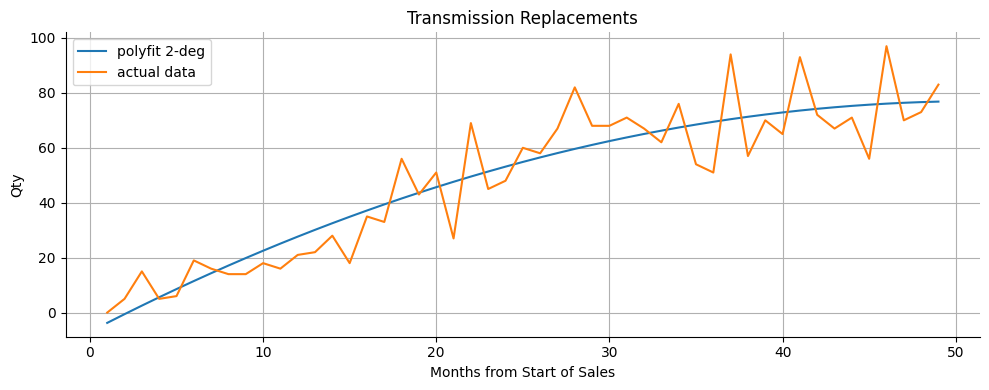

In [17]:
fig, ax = plt.subplots(figsize=(10,4))

ax.spines[['right', 'top']].set_visible(False)
plt.plot(x, ffit, label='polyfit 2-deg')
plt.plot(x, y, label='actual data')
plt.xlabel('Months from Start of Sales')
plt.ylabel('Qty')
plt.grid(visible=True)
plt.title('Transmission Replacements')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Create new x axis space to extend out to 100 units

In [18]:
x_new = np.linspace(1, 100, 100)

### Make plots with extended time (x axis) scale

In [19]:
ffit = poly.polyval(x_new, coefs)

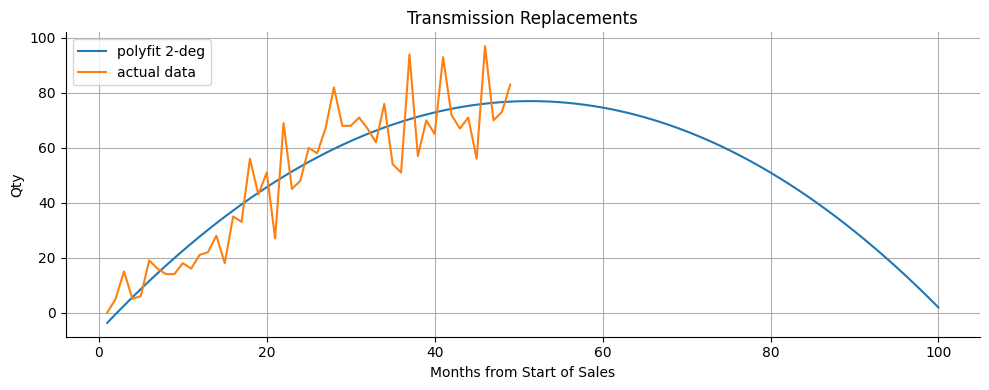

In [20]:
fig, ax = plt.subplots(figsize=(10,4))

ax.spines[['right', 'top']].set_visible(False)
plt.plot(x_new, ffit, label='polyfit 2-deg')
plt.plot(x, y, label='actual data')
plt.xlabel('Months from Start of Sales')
plt.ylabel('Qty')
plt.grid(visible=True)
plt.title('Transmission Replacements')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()